# Churn Predict 

## Import the librarys

In [ ]:
! pip install shap

     |████████████████████████████████| 564 kB 3.2 MB/s 


In [ ]:
# library and Data Manipulation
import pandas as pd
import numpy as np 

# Visualization libraries 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.legend_handler import HandlerLine2D

# Data preparation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, train
from sklearn.neural_network import MLPClassifier

# Evaluating the models
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report 
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
from sklearn .metrics import roc_auc_score
# Finding the best parameter for the Machine Learning Model
from sklearn.model_selection import GridSearchCV

# SHAP Values
import shap

# Serializing the model 
import joblib

# Avoiding unnecessary messages
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# set configurations for pandas display
pd.set_option('display.max_columns', None)
# seaborn configurantion
sns.set_theme(context='paper', style='darkgrid', palette='Oranges', font='sans-serif', font_scale=1, color_codes=True, rc=None)

## Reading the Data

In [ ]:
df = pd.read_csv('churn.csv')

## Preparing the dataset  

In [ ]:
def treate_data(df):
  df['AgeGroup'] = df['Age'].apply(lambda x: 1 if x >=55  else 0)  
  df["AgeCategory"] = 'Adult'
  df.loc[df['Age'] >= 55, 'AgeCategory'] ='Senior'
  df.loc[df['Age'] <= 25, 'AgeCategory'] = 'Young'
  df['Gender']= df['Gender'].map({'Male':0, 'Female':1})
  return df

In [ ]:
def get_dummies(df):
  Products = pd.get_dummies(df['NumOfProducts'])
  Geo = pd.get_dummies(df['Geography'])
  df = pd.concat([df, Products, Geo], axis=1)
  return df

In [ ]:
def delete(df):
  df = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'AgeCategory'], axis=1)
  return df

In [ ]:
df = (df.
    pipe(treate_data).
    pipe(get_dummies).
    pipe(delete))
    

In [ ]:
df1 = df[["CreditScore", "Gender","Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", 
          "EstimatedSalary", 1, 2	,3,	4,'France',	'Germany'	,'Spain', "Exited"]] #"AgeCategory"


In [ ]:
df1.columns

Index([    'CreditScore',          'Gender',             'Age',
                'Tenure',         'Balance',   'NumOfProducts',
             'HasCrCard',  'IsActiveMember', 'EstimatedSalary',
                       1,                 2,                 3,
                       4,          'France',         'Germany',
                 'Spain',          'Exited'],
      dtype='object')

In [ ]:
df.columns

Index([    'CreditScore',          'Gender',             'Age',
                'Tenure',         'Balance',   'NumOfProducts',
             'HasCrCard',  'IsActiveMember', 'EstimatedSalary',
                'Exited',        'AgeGroup',                 1,
                       2,                 3,                 4,
                'France',         'Germany',           'Spain'],
      dtype='object')

# Spiltting the features

In [ ]:
y = df1['Exited']
X = df1.drop(['Exited'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Balancing the classes

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Only apply the over/under sampling in the train data
sampling = RandomOverSampler()

In [ ]:
X_train_sampled, y_train_sampled = sampling.fit_resample(X_train, y_train)

## Evaluating the model

In [ ]:
# Choosing the models
models = {'KNN':               KNeighborsClassifier(),  
          'Extra Tree':        ExtraTreesClassifier(),  
          'Random Forest':     RandomForestClassifier(),   
          'XGBoost':           XGBClassifier(), 
          'AdaBoost':          AdaBoostClassifier(),  
          'Gradient Boosting': GradientBoostingClassifier(),  
          'Neural Networks':     MLPClassifier()}  
          
# evaluating the models
for reg, modelo in zip(models.values(),models.keys()):
  regressor = reg
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print(modelo)
  print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
  print(f"Precision: {precision_score(y_test, y_pred)*100}%")
  print(f"Recall:    {recall_score(y_test, y_pred)*100}%")
  print(f"F1-Score:  {f1_score(y_test, y_pred)*100}%")
  print('---------------------------------')

KNN
Acccuracy: 76.9090909090909%
Precision: 25.514403292181072%
Recall:    9.642301710730948%
F1-Score:  13.99548532731377%
---------------------------------
Extra Tree
Acccuracy: 86.42424242424242%
Precision: 73.60774818401937%
Recall:    47.27838258164852%
F1-Score:  57.57575757575757%
---------------------------------
Random Forest
Acccuracy: 87.09090909090908%
Precision: 76.01918465227818%
Recall:    49.30015552099534%
F1-Score:  59.81132075471699%
---------------------------------
XGBoost
Acccuracy: 87.03030303030303%
Precision: 76.28361858190709%
Recall:    48.52255054432349%
F1-Score:  59.31558935361216%
---------------------------------
AdaBoost
Acccuracy: 85.75757575757575%
Precision: 70.06960556844548%
Recall:    46.96734059097978%
F1-Score:  56.238361266294234%
---------------------------------
Gradient Boosting
Acccuracy: 86.9090909090909%
Precision: 75.669099756691%
Recall:    48.367029548989116%
F1-Score:  59.01328273244781%
---------------------------------
Redes Neurais

### Training the best model

In [ ]:
EXC1 = ExtraTreesClassifier()
EXC1.fit(X_train_sampled, y_train_sampled)

ExtraTreesClassifier()

In [ ]:
# Check the best parameters
EXC1.fit(X_train,y_train) 
y_pred_EXC1 = EXC1.predict(X_test) 
print(f"Acccuracy: {accuracy_score(y_test, y_pred_EXC1)*100}%")
print(f"Precision: {precision_score(y_test, y_pred_EXC1)*100}%")
print(f"Recall:    {recall_score(y_test, y_pred_EXC1)*100}%")
print(f"F1-Score:  {f1_score(y_test, y_pred_EXC1)*100}%")

Acccuracy: 86.54545454545455%
Precision: 73.74701670644392%
Recall:    48.055987558320375%
F1-Score:  58.19209039548022%


Founding the [best parameters](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae)

In [ ]:
print('Hyperparameters currently in use:\n')
pprint(EXC1.get_params())

Hyperparameters currently in use:

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


### Checking the mertrics of the current model

In [ ]:
# Check the best parameters
#model = RandomForestClassifier(bootstrap='True',  criterion='gini',  max_features= 5, min_samples_split= 3,  n_estimators= 100)
EXC1.fit(X_train_sampled,y_train_sampled)
y_pred_EXC1 = EXC1.predict(X_test) 
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall:    {recall_score(y_test, y_pred)*100}%")
print(f"F1-Score:  {f1_score(y_test, y_pred)*100}%")

Acccuracy: 56.54545454545455%
Precision: 22.24561403508772%
Recall:    49.30015552099534%
F1-Score:  30.657640232108317%


In [ ]:
confusion_matrix(y_pred= y_pred, y_true = y_test)
print(classification_report(y_pred= y_pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.83      0.58      0.68      2657
           1       0.22      0.49      0.31       643

    accuracy                           0.57      3300
   macro avg       0.52      0.54      0.50      3300
weighted avg       0.71      0.57      0.61      3300



In [ ]:
from sklearn.metrics import plot_confusion_matrix

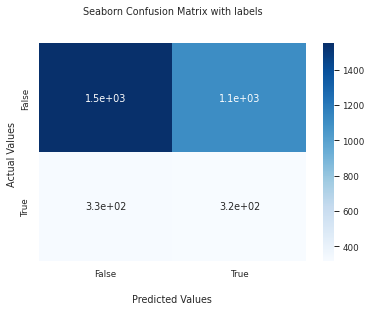

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

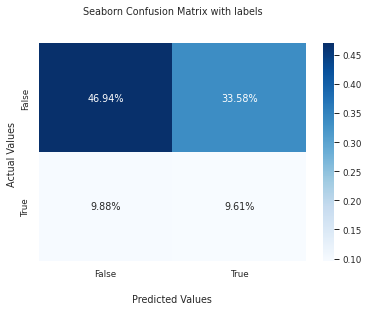

In [ ]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Founding the best parameters

Here we start to find the best parameters. Let's improve:

* n_estimators 
* max_depth 
* min_samples_split 
* min_samples_leaf 
* max_features

### Learning rate 

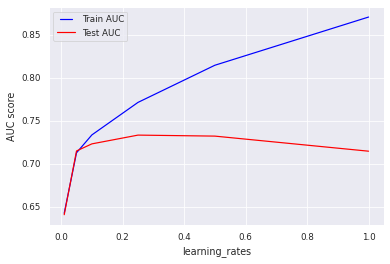

In [ ]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
   
#plotting the best parameters
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("learning_rates")
plt.show()

### N_Estimators

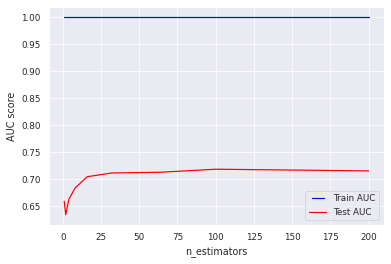

In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for eta in n_estimators:
   model = ExtraTreesClassifier(n_estimators=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
   
#plotting the best parameters
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

### Max_depths

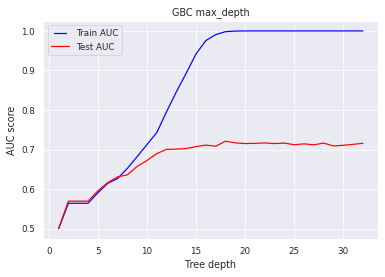

In [ ]:
# 
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
#
for max_depth in max_depths:
   model = ExtraTreesClassifier(max_depth=max_depth)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
   
#plotting the best parameters
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.title("GBC max_depth")
plt.show()

### min_samples_split

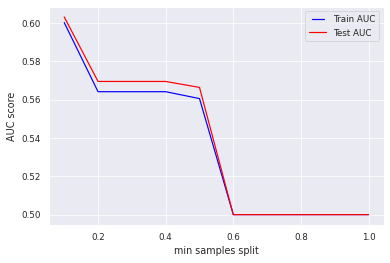

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   model = ExtraTreesClassifier(min_samples_split=min_samples_split)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

### min_samples_leaf

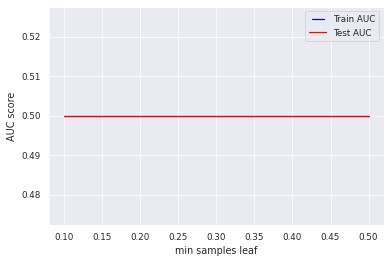

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   model = ExtraTreesClassifier(min_samples_leaf=min_samples_leaf)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


line1, = plt.plot(min_samples_leafs, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()


### max_features

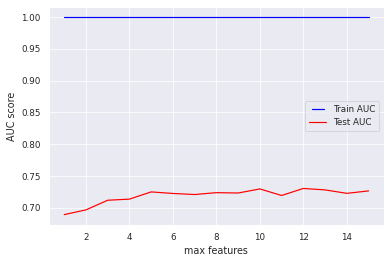

In [ ]:
max_features = list(range(1,X_train.shape[1]))

train_results = []
test_results = []

for max_feature in max_features:
   model = ExtraTreesClassifier(max_features=max_feature)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max features")
plt.show()

# Update of best parameters

In [ ]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train_sampled, y_train_sampled)

GradientBoostingClassifier()

In [ ]:
EXC1 = ExtraTreesClassifier()
EXC1.fit(X_train_sampled, y_train_sampled)

ExtraTreesClassifier()

In [ ]:
GBC_final = GradientBoostingClassifier(learning_rate= 0.2, n_estimators=100, max_depth=15, max_features=12)
GBC_final.fit(X_train_sampled, y_train_sampled)

GradientBoostingClassifier(learning_rate=0.2, max_depth=15, max_features=12)

In [ ]:
EXC_final = ExtraTreesClassifier(criterion="gini", n_estimators=100, max_depth=15, max_features=10)
EXC_final.fit(X_train_sampled, y_train_sampled)

ExtraTreesClassifier(max_depth=15, max_features=10)

### Checking the metrics of each model

In [ ]:
# Check the best parameters
EXC_final.fit(X_train_sampled, y_train_sampled) 
y_pred_EXC_final = EXC_final.predict(X_test)
print(f"Acccuracy: {accuracy_score(y_test, y_pred_EXC_final)*100}%")
print(f"Precision: {precision_score(y_test, y_pred_EXC_final)*100}%")
print(f"Recall:    {recall_score(y_test, y_pred_EXC_final)*100}%")
print(f"F1-Score:  {f1_score(y_test, y_pred)*100}%")

Acccuracy: 84.7878787878788%
Precision: 62.1342512908778%
Recall:    56.143079315707624%
F1-Score:  58.63309352517986%


In [ ]:
GBC_final.fit(X_train_sampled,y_train_sampled)
y_pred_GBC_final= GBC_final.predict(X_test)
print(f"Acccuracy: {accuracy_score(y_test, y_pred_GBC_final)*100}%")
print(f"Precision: {precision_score(y_test, y_pred_GBC_final)*100}%")
print(f"Recall:    {recall_score(y_test, y_pred_GBC_final)*100}%")
print(f"F1-Score:  {f1_score(y_test, y_pred_GBC_final)*100}%")

Acccuracy: 85.54545454545455%
Precision: 68.86363636363636%
Recall:    47.12286158631415%
F1-Score:  55.95567867036011%


In [ ]:
# https://towardsdatascience.com/deep-learning-with-python-neural-networks-complete-tutorial-6b53c0b06af0

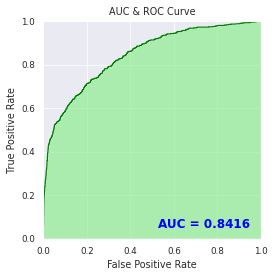

In [ ]:
y_pred1 = EXC_final.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(y_test, y_pred1)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred1)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Explorying the model prediction with SHAP

In [ ]:
feature_dict = dict(enumerate(df.drop("Exited", 1).columns))

In [ ]:
# Let's try to explain the model with shap values
explainer = shap.Explainer(GBC_final)
shap_values = explainer.shap_values(X_test)

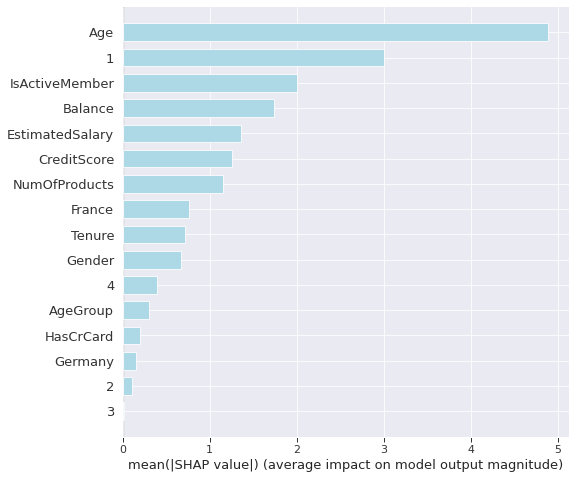

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names = list(feature_dict.values()), plot_type = "bar", color = "lightblue")

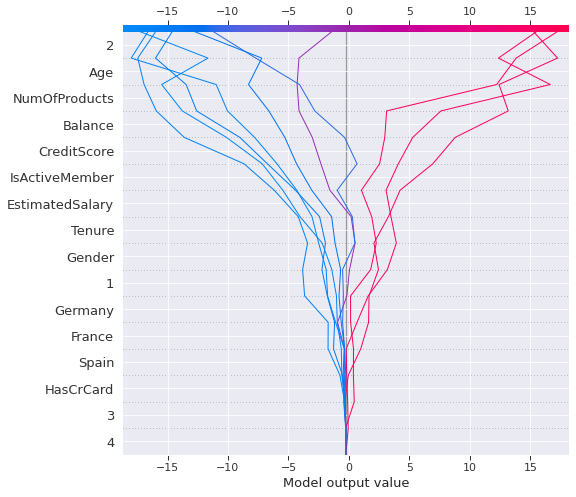

In [ ]:
# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X.columns))

## Exporting the model

In [ ]:
model_GBC = {
'model': GBC_final, 
'features_modelo': list(X_train.columns)
}

model_EXC = {
    'model': EXC_final, 
'features_modelo': list(X_train.columns)
}

In [ ]:
joblib.dump(model_GBC, 'GBC_model.pickle')
joblib.dump(model_EXC, 'EXC_model.pickle')

['EXC_model.pickle']

In [ ]:
model1 = joblib.load('GBC_model.pickle')
model2 = joblib.load('EXC_model.pickle')